# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">5. Level 2 Binary Classification</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546    |

---

### **5. Level 2 Binary Classification Notebook**
**Description:**
This notebook focuses on the **Level 2 Binary Classification model**, which distinguishes between the two most common classes identified in Level 1:
- **2 - NON-COMP**
- **4 - TEMPORARY**

Key steps include:
- Loading the subset of **“Common”** cases from Level 1 predictions.
- **Feature selection:** Tailor feature preprocessing and selection for this binary classification task.
- **Model training:** Train and evaluate a binary classification model to distinguish between the two classes.
- **Evaluation:** Use metrics like accuracy, precision, recall, and F1-score to measure performance.
- **Output:** Save predictions for integration in the final notebook.

This notebook refines the classification of cases within the most common classes, contributing to the pipeline's accuracy.

---


## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [4.1. Preparing the Data](#section_4_1)  
        * [4.1.1. Scaling the Numerical Data](#section_4_1_1)
        * [4.1.2. Encoding the Categorical Data](#section_4_1_2)
    * [4.2. Numerical Features](#section_4_2) 
        * [4.2.1. Spearman Correlation Matrix](#section_4_2_1)
        * [4.2.2. LASSO Regression](#section_4_2_2)
        * [4.2.3. Recursive Feature Elimination - RFE](#section_4_2_3)
        * [4.2.4. Feature Importance - Decision Tree](#section_4_2_4)
        * [4.2.5. Feature Importance - Random Forest](#section_4_2_5)
    * [4.3. Categorical Features](#section_4_3)
        * [4.3.1. $\chi ^2$ Test for Independence](#section_4_3_1)
        * [4.3.2. Mutual Information Criterion (MIC)](#section_4_3_2)
    * [4.4. Final Features](#section_4_4)
* [5. Modelling](#chapter5)
  * [5.1. Logistic Regression](#section_5_1)
  * [5.2. Random Forest Trees](#section_5_2)
  * [5.3. Decision Trees](#section_5_3)
  * [5.4. Gradient Boosting](#section_5_4)
  * [5.5. Summary of Models](#section_5_5)
* [6. Loading the results](#chapter6)


# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

In [69]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile


# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#from xgboost import XGBClassifier

# --- Warnings ---


import warnings
warnings.filterwarnings('ignore')


#Import from utils the used functions
from utils import plot_importance, cor_heatmap, find_optimal_features_with_rfe, compare_rf_feature_importances,compare_feature_importances, select_high_score_features_chi2_no_model,select_high_score_features_MIC, metrics

#Modeling 
from sklearn.ensemble import RandomForestClassifier

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
In this topic we will load the X_train and X_val preprocessed from Notebook 1, and the df_test with the prediction from notebook 2.

In [70]:
#Import the datasets
X_train = pd.read_csv("../processed_datasets/X_train_model.csv", index_col="Claim Identifier")
X_val = pd.read_csv("../processed_datasets/X_val_model.csv", index_col="Claim Identifier")
df_test = pd.read_csv("../processed_datasets/df_test_model.csv", index_col="Claim Identifier")

Let's open the dataset.

In [71]:
X_train.head(3)

,Unnamed: 0,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Category Combination,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,0,24.0,0.0,816.0,1996.0,STATE INSURANCE FUND,SIF,CAYUGA,0.0,SYRACUSE,M,0.0,11.0,I,53.0,52.0,55.0,13143.0,3.0,SIF-M,SIF_SYRACUSE,Lower-Middle Income,0,2,2020,1,0,Youth,Until 1 week,Until 1 week,Form Not Received,OTHER,SIF,STATE INSURANCE FUND,Lower Extremities,Specific Injury,Strain or Injury By,High Risk,204.000000
6023025,1,36.0,1.0,1097.0,1986.0,SIRIUSPOINT AMERICA INSURANCE,PRIVATE,QUEENS,0.0,NYC,M,4.0,31.0,IV,31.0,10.0,65.0,11368.0,2.0,PRIVATE-M,PRIVATE_NYC,Middle Income,111,2,2022,1,0,Young Adult,1 to 3 months,1 to 3 months,1 to 3 months,11368.0,PRIVATE,OTHER,Multiple Body Parts,Specific Injury,"Fall, Slip, or Trip",High Risk,365.666667
5851908,2,41.0,1.0,623.0,1980.0,INDEMNITY INS. OF N AMERICA,PRIVATE,MONROE,0.0,ROCHESTER,F,2.0,33.0,I,56.0,52.0,38.0,14580.0,3.0,PRIVATE-F,PRIVATE_ROCHESTER,Low Income,674,2,2021,2,0,Young Adult,3 to 6 months,3 to 6 months,3 to 6 months,OTHER,PRIVATE,INDEMNITY INS. OF N AMERICA,Upper Extremities,Specific Injury,Strain or Injury By,High Risk,155.750000


In [72]:
X_val.head(3)

,Unnamed: 0,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Category Combination,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5893917,0,NaN,1.0,1538.0,NaN,ACE AMERICAN INSURANCE CO.,PRIVATE,BRONX,0.0,NYC,M,2.0,23.0,UK,97.0,80.0,101.0,10467.0,2.0,PRIVATE-M,PRIVATE_NYC,Upper-Middle Income,242,3,2021,0,0,NaN,3 to 6 months,3 to 6 months,3 to 6 months,10467.0,PRIVATE,ACE AMERICAN INSURANCE CO.,Lower Extremities,Occupational Disease or Cumulative Injury,Strain or Injury By,High Risk,512.666667
5978089,1,59.0,0.0,1696.0,1963.0,ZURICH AMERICAN INSURANCE CO,PRIVATE,NIAGARA,0.0,BUFFALO,M,0.0,42.0,I,81.0,10.0,32.0,14094.0,3.0,PRIVATE-M,PRIVATE_BUFFALO,Upper-Middle Income,0,2,2022,0,0,Middle Age,Until 1 week,Until 1 week,Form Not Received,14094.0,PRIVATE,ZURICH AMERICAN INSURANCE CO,Multiple Body Parts,Specific Injury,Struck or Injured by,Medium Risk,424.000000
5622704,2,28.0,1.0,1266.0,1987.0,GREAT DIVIDE INSURANCE COMPANY,PRIVATE,ERIE,0.0,BUFFALO,M,1.0,71.0,UK,60.0,52.0,38.0,20171.0,5.0,PRIVATE-M,PRIVATE_BUFFALO,Middle Income,2121,3,2015,1,0,Young Adult,More than 1 year,More than 1 year,More than 1 year,OTHER,PRIVATE,OTHER,Upper Extremities,Specific Injury,Strain or Injury By,Medium Risk,211.000000


In [73]:
X_train = X_train.drop(columns=['Unnamed: 0'])
X_val = X_val.drop(columns=['Unnamed: 0'])

In [89]:
X_train.isna().sum().sum()

171781

In [90]:
X_val.isna().sum().sum()

75617

We also need to load the test dataset resulted from notebook 2, with the best predictions.

In [77]:
df_test.head(3)

,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Carrier_District_Interaction,Income_Category,Days_To_First_Hearing,Accident_Quarter,Accident_Year,Accident Day,Accident on Weekend,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent,Predictions
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19,0,1245.935970,2003.0,INDEMNITY INSURANCE CO OF,PRIVATE,BRONX,0,NYC,M,0.0,10,IV,31,10,54,10466,1,PRIVATE_NYC,Upper-Middle Income,0,4,2022,5,1,Youth,Between 1 and 2 weeks,Between 1 and 2 weeks,No form received,10466,PRIVATE,INDEMNITY INSURANCE CO OF,Lower Extremities,Specific Injury,"Fall, Slip, or Trip",Unknown Risk,622.967985,0
6166141,19,0,809.300149,2003.0,A I U INSURANCE COMPANY,PRIVATE,QUEENS,0,NYC,F,0.0,9,IV,75,10,10,11691,1,PRIVATE_NYC,Low Income,0,4,2022,6,1,Youth,1 to 3 months,1 to 3 months,No form received,11691,PRIVATE,A I U INSURANCE COMPANY,Head,Specific Injury,Struck or Injured by,Unknown Risk,404.650075,0
6165907,59,0,938.125909,1963.0,AMGUARD INSURANCE COMPANY,PRIVATE,WESTCHESTER,0,NYC,F,0.0,17,III,68,49,62,10604,0,PRIVATE_NYC,Lower-Middle Income,0,4,2022,0,0,Middle Age,Until 1 week,Until 1 week,No form received,OTHER,PRIVATE,OTHER,Trunk,Specific Injury,Striking Against or Stepping On,Unknown Risk,938.125909,0


We will also upload the y train and y_val.

In [78]:
# Load the arrays
y_train = np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)
y_val =  np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)

Let's remove the column predictions from the df_test saving in a variable y_test

In [79]:
y_test = df_test['Predictions']
df_test.drop('Predictions', axis=1, inplace=True)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>

In this notebook, our objective is to distinguish the majority classes from the subset of the dataset where the predicted targets from Notebook 2 were identified as majority classes. Specifically, we will focus on the portion of the dataset with target labels `'2. NON-COMP'` or `'4. TEMPORARY'`. This refined selection allows us to target the classification of majority classes with greater precision.

In [80]:
#Filtering the majority classes
X_train_2_4 = X_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

y_train_2_4 = y_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

Do the same for validation dataset.

In [81]:
#Filtering the majority classes
X_val_2_4 = X_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

y_val_2_4 = y_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

Now, we will encode the target.

In [82]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train_2_4)  # Fit and transform on y_train_2_4
y_val_encoded = encoder.transform(y_val_2_4)  # Only transform on y_val_2_4

In [83]:
# Verify that the target is encoded 
print(f'{y_train_encoded}')
y_val_encoded

[0 1 1 ... 1 0 0]


array([1, 1, 0, ..., 0, 0, 0])

# 4. Feature Selection <a class="anchor" id="chapter4"></a>

The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train_processed` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

The `X_train_processed.describe(include='O').T` command provides an overview of the categorical features in the dataset, displaying the count, unique values, top (most frequent) category, and its frequency. This summary helps us understand the distribution and cardinality of each categorical feature, which is essential for feature selection and preprocessing.

#### Descriptive Statistics for Categorical Features

In [84]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train_2_4.describe(include='O').T

,count,unique,top,freq
Carrier Name,307445,1878,STATE INSURANCE FUND,56694
Carrier Type,307445,7,PRIVATE,160393
County of Injury,307445,63,QUEENS,30429
District Name,307445,8,NYC,145157
Gender,307445,3,M,175189
Medical Fee Region,307445,5,IV,139750
Zip Code,307445.0,8294.0,11236.0,2815.0
Category Combination,307445,19,PRIVATE-M,91459
Carrier_District_Interaction,307445,49,PRIVATE_NYC,75473
Income_Category,303448,5,Middle Income,121377


#### Descriptive Statistics for Numerical Features

In [85]:
X_train_2_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,277778.0,42.463554,13.732722,5.000000,31.0,42.00,54.0,82.0
Attorney/Representative,307445.0,0.241370,0.427915,0.000000,0.0,0.00,0.0,1.0
Average Weekly Wage,303448.0,1209.541902,5747.811383,23.000000,838.0,1163.00,1326.0,2659398.0
Birth Year,277778.0,1978.402152,13.817211,1940.000000,1967.0,1979.00,1990.0,2006.0
COVID-19 Indicator,307445.0,0.056521,0.230925,0.000000,0.0,0.00,0.0,1.0
IME-4 Count,307445.0,0.651323,1.945058,0.000000,0.0,0.00,0.0,48.0
Industry Code,303338.0,57.699068,18.806121,11.000000,45.0,61.00,62.0,92.0
WCIO Cause of Injury Code,307445.0,53.367217,26.984142,0.000000,29.0,56.00,75.0,99.0
WCIO Nature of Injury Code,307445.0,40.550121,22.812505,0.000000,13.0,49.00,52.0,91.0
WCIO Part Of Body Code,307445.0,46.676404,23.670941,0.000000,35.0,42.00,55.0,101.0


These features provide comprehensive information across demographics, injury details, socioeconomics, and temporal aspects, making them well-suited to predicting claim outcomes.

In [86]:
X_train_2_4.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Category Combination',
       'Carrier_District_Interaction', 'Income_Category',
       'Days_To_First_Hearing', 'Accident_Quarter', 'Accident_Year',
       'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category',
       'promptness_C3_category', 'Zip_Code_Simplified', 'Carrier Type Merged',
       'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
       'Salary_Per_Dependent'],
      dtype='object')

This structured feature selection summary provides insights into the main features, both categorical and numerical, used in the model. The focus on grouping, simplification, and categorization ensures the model captures the relevant patterns without unnecessary complexity.

## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>

 ### 4.1.1. Encoding the Categorical Data<a class="anchor" id="sub_section_4_1_1"></a>

 We'll apply the Chi-squared test on categorical features to check for independence. This test is suitable for categorical data and helps identify features that have significant associations with the target variable.

In [87]:
#To make sure that we keep the preprocessed dataset without the encoded columns
X_train_processed_copy = X_train_2_4.copy()
X_val_processed_copy = X_val_2_4.copy()
df_test_processed_copy = df_test.copy()

**Approach: Encoding Categorical Features with LabelEncoder, OneHotEncoder and Frequency encoder**

In our approach we decided to perform different type of encoding according with each categorical variable. For ordinal features (those with an inherent order like age groups), Label Encoding is applied to assign each category a unique numerical value. For nominal features with low cardinality (few unique values), One-Hot Encoding is used to create binary columns representing each category. For high-cardinality features (many unique values like zip codes), Frequency Encoding is applied to convert categories to their frequency of occurrence, reducing dimensionality without introducing too many columns.

These encoding methods are used to properly represent categorical features in a numerical format while considering their characteristics (order or cardinality), which helps models interpret them effectively.

In [88]:
# Columns to encode
ordinal_features = ['promptness_category', 'promptness_C2_category','promptness_C3_category', 'Age Group', 'Income_Category', 'Industry Risk']
low_cardinality_cols = ['Gender', 'Medical Fee Region','Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category']
high_cardinality_cols = ['Carrier_Name_Simplified', 'Zip_Code_Simplified', 'Industry Code', 'County of Injury', 'Carrier Type Merged',
                         'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code','Carrier_District_Interaction', 'District Name']


# Check for NaN or nulls
# print(X_val_processed_copy[ordinal_features + low_cardinality_cols + high_cardinality_cols].isnull().sum())

# Sum all the NaN values in the datasets
missing_values_total = (
    X_train_processed_copy.isnull().sum().sum() +
    X_val_processed_copy.isnull().sum().sum() +
    df_test_processed_copy.isnull().sum().sum()
)

print(f"Total NaN values in all  the datasets: {missing_values_total}")

Total NaN values in all  the datasets: 214376


###ISTO DEVERÁ DAR ZERO MISSING VALYES, SE DER ENTÃO APAGAR A CELULA DE BAIXO

In [62]:
# Columns with missing values
columns_with_missing = ['Age Group', 'Income_Category', 'Body_Part_Category', 
                        'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Code']

# Function to replace missing values with mode
def replace_missing_with_mode(df, columns):
    for col in columns:
        mode_value = df[col].mode()[0]  # Calculate mode for the column
        df[col].fillna(mode_value, inplace=True)  # Replace missing values with mode

# Apply the function to all datasets
replace_missing_with_mode(X_val_processed_copy, columns_with_missing)
replace_missing_with_mode(X_train_processed_copy, columns_with_missing)
replace_missing_with_mode(df_test_processed_copy, columns_with_missing)

# Verify that missing values have been replaced
print("X_val_processed_copy missing values:\n", X_val_processed_copy[columns_with_missing].isnull().sum())
print("\nX_train_processed_copy missing values:\n", X_train_processed_copy[columns_with_missing].isnull().sum())
print("\ndf_test_processed_copy missing values:\n", df_test_processed_copy[columns_with_missing].isnull().sum())

X_val_processed_copy missing values:
 Age Group                 0
Income_Category           0
Body_Part_Category        0
Injury_Nature_Category    0
Injury_Cause_Category     0
Industry Code             0
dtype: int64

X_train_processed_copy missing values:
 Age Group                 0
Income_Category           0
Body_Part_Category        0
Injury_Nature_Category    0
Injury_Cause_Category     0
Industry Code             0
dtype: int64

df_test_processed_copy missing values:
 Age Group                 0
Income_Category           0
Body_Part_Category        0
Injury_Nature_Category    0
Injury_Cause_Category     0
Industry Code             0
dtype: int64


In [66]:
# Sum all the NaN values in the datasets
missing_values_total = (
    X_train_processed_copy.isnull().sum().sum() +
    X_val_processed_copy.isnull().sum().sum() +
    df_test_processed_copy.isnull().sum().sum()
)

print(f"Total NaN values in all  the datasets: {missing_values_total}")

Total NaN values in all  the datasets: 103121


In [ ]:
#For now since the pre processing isnt finish lets replace nan by 0 the row tha has nan vlaues
X_train_processed_copy = X_train_processed_copy.fillna(0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Step 1: Label Encode ordinal features (features with intrinsic order)
label_encoder_1 = LabelEncoder()
for col in ordinal_features:
    # Ensure input is a column from the DataFrame
    print(f"Processing ordinal feature: {col}")
    X_train_processed_copy[col] = label_encoder_1.fit_transform(X_train_processed_copy[col])
    X_val_processed_copy[col] = label_encoder_1.transform(X_val_processed_copy[col])
    df_test_processed_copy[col] = label_encoder_1.transform(df_test_processed_copy[col])

# Step 2: One-Hot Encode low-cardinality nominal features
print("\nProcessing low-cardinality features for One-Hot Encoding...")
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # Corrected argument

# Extract the subset of low-cardinality columns
low_cardinality_train = X_train_processed_copy[low_cardinality_cols]
low_cardinality_val = X_val_processed_copy[low_cardinality_cols]
low_cardinality_test = df_test_processed_copy[low_cardinality_cols]

# Apply One-Hot Encoding and convert sparse matrix to dense
one_hot_encoded_train = one_hot_encoder.fit_transform(low_cardinality_train).toarray()
one_hot_encoded_val = one_hot_encoder.transform(low_cardinality_val).toarray()
one_hot_encoded_test = one_hot_encoder.transform(low_cardinality_test).toarray()

# Get feature names for the encoded columns
feature_names = one_hot_encoder.get_feature_names_out(low_cardinality_cols)

# Convert One-Hot Encoded arrays to DataFrames with correct index and columns
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=feature_names, index=low_cardinality_train.index)
one_hot_encoded_val_df = pd.DataFrame(one_hot_encoded_val, columns=feature_names, index=low_cardinality_val.index)
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=feature_names, index=low_cardinality_test.index)

# Concatenate with original datasets
X_train_processed_copy = pd.concat([X_train_processed_copy, one_hot_encoded_train_df], axis=1)
X_val_processed_copy = pd.concat([X_val_processed_copy, one_hot_encoded_val_df], axis=1)
df_test_processed_copy = pd.concat([df_test_processed_copy, one_hot_encoded_test_df], axis=1)

# Drop original low-cardinality columns
X_train_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=low_cardinality_cols, inplace=True)

# Step 3: Frequency Encoding for high-cardinality nominal features
print("\nProcessing high-cardinality features for Frequency Encoding...")
for col in high_cardinality_cols:
    print(f"Encoding high-cardinality feature: {col}")
    # Frequency count based on the training data
    freq = X_train_processed_copy[col].value_counts()
    # Apply mapping to all datasets
    X_train_processed_copy[f"{col}_freq"] = X_train_processed_copy[col].map(freq).fillna(0)
    X_val_processed_copy[f"{col}_freq"] = X_val_processed_copy[col].map(freq).fillna(0)
    df_test_processed_copy[f"{col}_freq"] = df_test_processed_copy[col].map(freq).fillna(0)

# Drop original high-cardinality columns
X_train_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=high_cardinality_cols, inplace=True)

# Final datasets after encoding
X_train_final = X_train_processed_copy.copy()
X_val_final = X_val_processed_copy.copy()
X_test_final = df_test_processed_copy.copy()

# Summary
print("\nSummary of encoded datasets:")
print("Final X_train_final shape:", X_train_final.shape)
print("Final X_val_final shape:", X_val_final.shape)
print("Final X_test_final shape:", X_test_final.shape)

Processing ordinal feature: promptness_category
Processing ordinal feature: promptness_C2_category
Processing ordinal feature: promptness_C3_category
Processing ordinal feature: Age Group
Processing ordinal feature: Income_Category
Processing ordinal feature: Industry Risk

Processing low-cardinality features for One-Hot Encoding...

Processing high-cardinality features for Frequency Encoding...
Encoding high-cardinality feature: Carrier_Name_Simplified
Encoding high-cardinality feature: Zip_Code_Simplified
Encoding high-cardinality feature: Industry Code
Encoding high-cardinality feature: County of Injury
Encoding high-cardinality feature: Carrier Type Merged
Encoding high-cardinality feature: WCIO Cause of Injury Code
Encoding high-cardinality feature: WCIO Nature of Injury Code
Encoding high-cardinality feature: WCIO Part Of Body Code
Encoding high-cardinality feature: Carrier_District_Interaction
Encoding high-cardinality feature: District Name

Summary of encoded datasets:
Final X

**Why Are There Missing Values (NaN) in Validation and Test Sets?**

During the encoding process, missing values (NaN) may appear in the validation and test sets because certain categories that exist in these sets might not be present in the training set. For instance, during frequency encoding, if a category exists only in the validation or test set but not in the training set, it will result in missing values when encoding those rows.

To address this, we can fill these missing values with a placeholder such as `0`, ensuring consistent feature representation across all datasets, for now. For next deliverable we will try to implement better approaches.

In [ ]:
# Summing all the NaN values in the datasets
missing_values_total = (
    X_train_processed_copy.isnull().sum().sum() +
    X_val_processed_copy.isnull().sum().sum() +
    df_test_processed_copy.isnull().sum().sum()
)

print(f"Total NaN sum: {missing_values_total}")

Total NaN sum: 0


In [ ]:
#Prepare final dataset for MIC and χ² analysis
# Use only the encoded features for the MIC and chi-squared tests
mic_chi2_features = binary_columns + ordinal_features + list(one_hot_encoded_train_df.columns) + [f"{col}_freq" for col in high_cardinality_cols]
X_train_mic_chi2 = X_train_processed_copy[mic_chi2_features]

In [ ]:
len(X_train_mic_chi2.columns)

44

In [ ]:
X_train_mic_chi2.columns

Index(['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend',
       'promptness_category', 'promptness_C2_category',
       'promptness_C3_category', 'Age Group', 'Income_Category',
       'Industry Risk', 'Gender_M', 'Gender_U', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UK', 'Body_Part_Category_Lower Extremities',
       'Body_Part_Category_Multiple Body Parts', 'Body_Part_Category_Neck',
       'Body_Part_Category_NonClassificable', 'Body_Part_Category_Trunk',
       'Body_Part_Category_Upper Extremities',
       'Injury_Nature_Category_Multiple Injuries',
       'Injury_Nature_Category_Occupational Disease or Cumulative Injury',
       'Injury_Nature_Category_Specific Injury',
       'Injury_Cause_Category_COVID-19 Injury',
       'Injury_Cause_Category_Caught In, Under, or Between',
       'Injury_Cause_Category_Cut, Puncture, Scrape',
       'Injury_Cause_Category_Fall, Slip, or Trip',
       'In

### 4.1.2. Scaling the Numerical Data  <a class="anchor" id="sub_section_4_1_2"></a>

**Converting Discrete Columns to Integer**

In this step, we ensure all discrete columns are converted to integer data types across the training, validation, and test datasets. This is crucial for consistent data handling and processing in subsequent steps.

In [201]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train_2_4[column] = X_train[column].astype(int)
    X_val_2_4[column] = X_val[column].astype(int)
    df_test[column] = df_test[column].astype(int)

**Scaling Features**

We apply the RobustScaler to the discrete columns. RobustScaler is beneficial for data containing outliers, as it scales data based on the median and interquartile range. This helps normalize the distribution without being heavily affected by outliers. We also use the same scaler to transform validation and test data.

In [202]:
X_train_2_4.shape

(306375, 38)

In [203]:
#scaling features
from sklearn.preprocessing import MinMaxScaler
feat_scaler = MinMaxScaler()
X_train_2_4[discrete_columns + continuous_columns] = feat_scaler.fit_transform(X_train_2_4[discrete_columns + continuous_columns])

X_train_num_scaled = X_train_2_4[discrete_columns + continuous_columns]

#apply same transformation for val data
X_val_2_4[discrete_columns + continuous_columns] = feat_scaler.transform(X_val_2_4[discrete_columns + continuous_columns])

X_val_num_scaled = X_val_2_4[discrete_columns + continuous_columns]

#apply same transformation for test data
df_test_num_scaled = feat_scaler.transform(df_test[discrete_columns + continuous_columns])

#X_val, X_train
X_train_num_scaled.head(4)

,Number of Dependents,IME-4 Count,Accident_Quarter,Accident_Year,Accident Day,Days_To_First_Hearing,Average Weekly Wage,Age at Injury,Salary_Per_Dependent
Claim Identifier,,,,,,,,,
5479022,0.500000,0.000000,0.333333,0.946429,0.166667,0.025765,0.000298,0.125000,0.000302
6023025,0.333333,0.083333,0.333333,0.982143,0.166667,0.032369,0.000404,0.312500,0.000545
5851908,0.500000,0.041667,0.333333,0.964286,0.333333,0.065869,0.000226,0.390625,0.000229
5913931,0.166667,0.041667,0.000000,0.982143,0.500000,0.042663,0.000383,0.671875,0.000779


**Variance Check After Scaling**

After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [204]:
# Check variance of scaled data
X_train_num_scaled.var()

Number of Dependents     0.111140
IME-4 Count              0.001647
Accident_Quarter         0.140934
Accident_Year            0.001100
Accident Day             0.092573
Days_To_First_Hearing    0.000206
Average Weekly Wage      0.000005
Age at Injury            0.041369
Salary_Per_Dependent     0.000007
dtype: float64

The output shows the variance of each discrete column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ### 4.1.3. Feature Categories <a class="anchor" id="sub_section_4_1_3"></a>

The features have been organized into three main categories: **Categorical Features**, **Binary Features**, and **Discrete Features**. Each category represents a different data type or structure, allowing for tailored preprocessing steps and analysis.

In [ ]:
X_train_2_4.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Category Combination',
       'Carrier_District_Interaction', 'Income_Category',
       'Days_To_First_Hearing', 'Accident_Quarter', 'Accident_Year',
       'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category',
       'promptness_C3_category', 'Zip_Code_Simplified', 'Carrier Type Merged',
       'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
       'Salary_Per_Dependent'],
      dtype='object')

In [ ]:
# Updating the feature categories with the new columns created
categorical_columns = ['Carrier Name', 'Carrier Type', 'County of Injury',
       'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
    'Carrier_District_Interaction',
       'Income_Category', 'Age Group',
       'promptness_category', 'promptness_C2_category','promptness_C3_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
     'Accident on Weekend'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

continuous_columns = ['Days_To_First_Hearing','Average Weekly Wage','Age at Injury',
                      'Salary_Per_Dependent'
                      ]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)
print("Continuous Features:", continuous_columns)

Categorical Features: ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Gender', 'IME-4 Count', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Carrier_District_Interaction', 'Income_Category', 'Age Group', 'promptness_category', 'promptness_C2_category', 'promptness_C3_category', 'Zip_Code_Simplified', 'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']
Continuous Features: ['Days_To_First_Hearing', 'Average Weekly Wage', 'Age at Injury', 'Salary_Per_Dependent']


 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>
### 4.2.1. Spearman Correlation Matrix <a class="anchor" id="sub_section_4_2_1"></a>

To better understand the relationships between numerical features, we generate Spearman and Pearson correlation matrices. Correlation matrices help identify linear and monotonic relationships between variables, which can be useful in feature selection and engineering.

##### Correlation Heatmap Function
The `cor_heatmap` function displays a heatmap of a given correlation matrix. We set various visual parameters to enhance readability:
- **figsize**: Sets the figure size.
- **cmap**: Chooses the color palette ('viridis').
- **mask**: Hides the upper triangle of the matrix for clarity.

In [205]:
from utils import cor_heatmap

#### Spearman Correlation Calculation and Plotting
Here, we calculate the Spearman correlation on the scaled numerical features and then plot the resulting matrix.

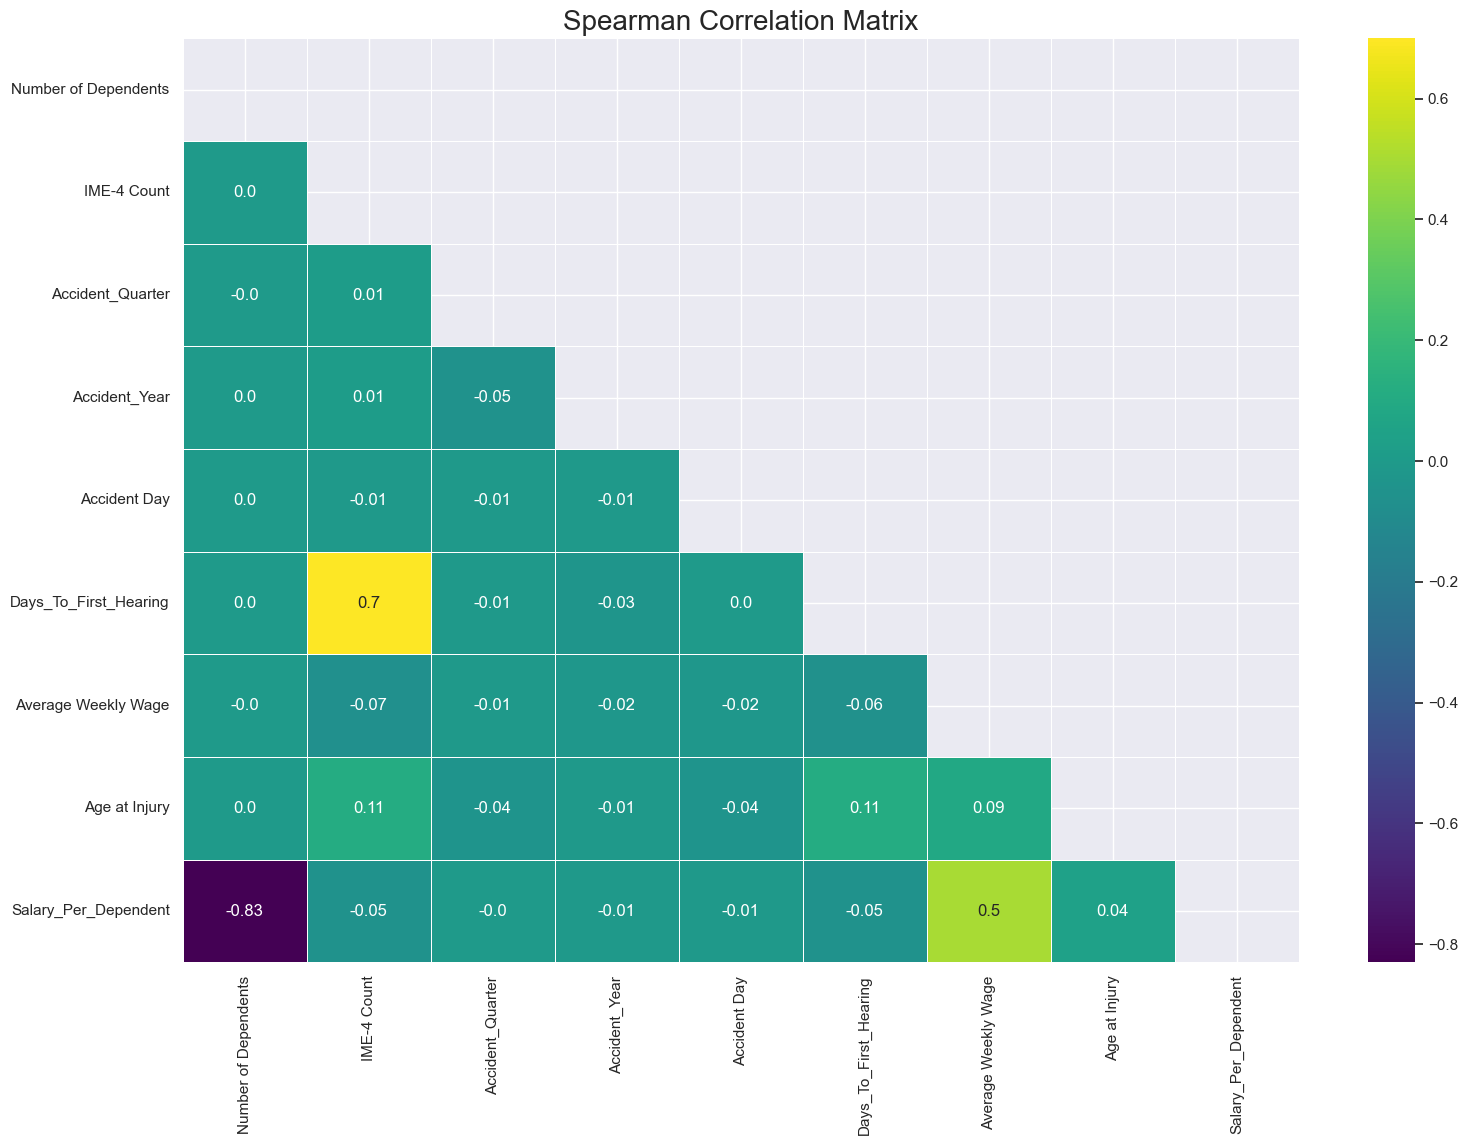

In [206]:
corr_data_numerical = X_train_num_scaled 
cor_spearman = corr_data_numerical.corr(method='spearman')

cor_heatmap(cor_spearman, 'Spearman')

### 4.2.2. LASSO Regression <a class="anchor" id="sub_section_4_2_2"></a>

 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [208]:
X_train_num_scaled.shape

(306375, 9)

In [209]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Accident_Year           -0.137975
Accident Day            -0.003124
Number of Dependents    -0.001939
Accident_Quarter        -0.000142
Average Weekly Wage      0.000000
Salary_Per_Dependent     0.000000
Age at Injury            0.097836
IME-4 Count              4.656509
Days_To_First_Hearing    5.383232
dtype: float64

**Observations:**

The LASSO model assigns non-zero coefficients only to the features it considers important.

IME-4 Count has the highest positive coefficient, indicating a strong positive relationship with the target variable, as well as Days_To_First_Hearing


Accident Day and Accident Quarter have smaller negative coefficients, implying a weaker inverse relationship with the target.

Average Weekly Wage and Number of Dependents has close to zero impact, suggesting it may not be a significant predictor in the model.

In [210]:
from utils import plot_importance, cor_heatmap

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

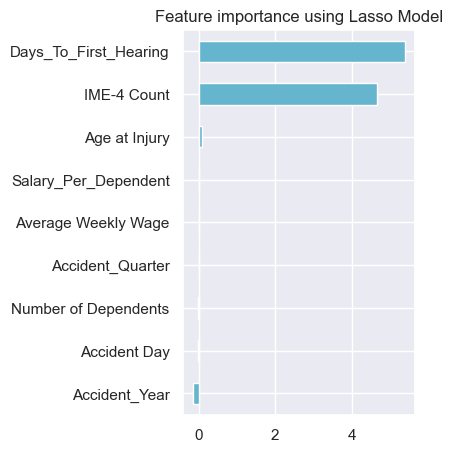

In [211]:
plot_importance(coef,'Lasso')

### 4.2.3. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_2_3"></a>

 RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

In [212]:
# RFE using Logistic Regression
model = LogisticRegression()

#Use the function defined in utils.py
best_features, best_score, scores = find_optimal_features_with_rfe(
    model, 
    X_train_num_scaled, 
    y_train_encoded, 
    X_val_num_scaled, 
    y_val_encoded,
    max_features=9
)


Optimum number of features: 2
F1 Macro Score with 2 features: 0.759367


**Observations:**

The loop evaluates models with 1 to 9 features, tracking the score for each.

The output indicates that 2 features yielded the highest validation f1_score score of 0.759367.

#### Applying RFE with the Optimal Number of Features
Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [213]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 2)

In [214]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [215]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents     False
IME-4 Count               True
Accident_Quarter         False
Accident_Year            False
Accident Day             False
Days_To_First_Hearing     True
Average Weekly Wage      False
Age at Injury            False
Salary_Per_Dependent     False
dtype: bool

### 4.2.4. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_2_4"></a>

In [216]:
from utils import compare_feature_importances

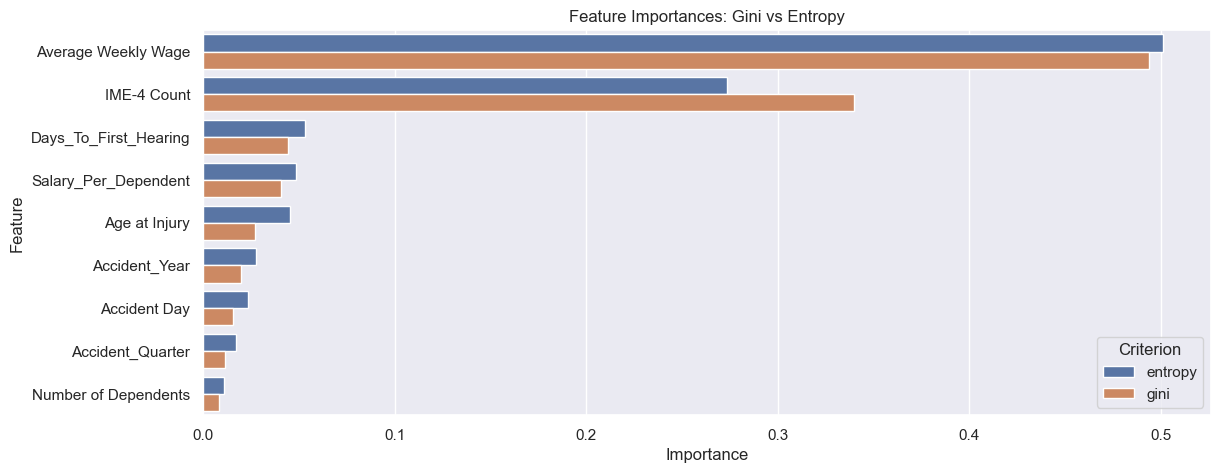

       gini   entropy                   col
0  0.007969  0.010900  Number of Dependents
1  0.339732  0.273471           IME-4 Count
2  0.011145  0.016966      Accident_Quarter
3  0.019753  0.027426         Accident_Year
4  0.015506  0.023348          Accident Day


In [217]:
# Call the function with your training data
zippy = compare_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(zippy.head())

### 4.2.5. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_2_5"></a>

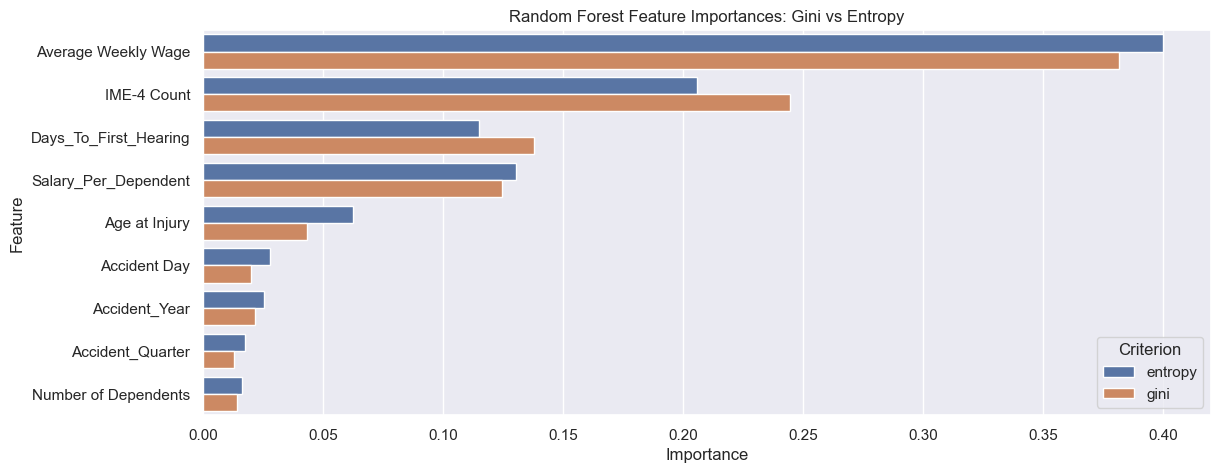

       gini   entropy                   col
0  0.014163  0.016008  Number of Dependents
1  0.244305  0.205718           IME-4 Count
2  0.012618  0.017276      Accident_Quarter
3  0.021598  0.025481         Accident_Year
4  0.019820  0.027836          Accident Day


In [218]:
# Call the function with your training data
importances = compare_rf_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(importances.head())

## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
Chi-squared and MIC for the categorical ones.

 ### 4.3.1. $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_3_1"></a>
The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. In this analysis, we set a threshold to keep the 25 most relevant features.

In [235]:
from utils import select_high_score_features_chi2_no_model

In [236]:
# Example usage
high_score_features_chi2, scores = select_high_score_features_chi2_no_model(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=25
)

Top 25 features based on Chi-square scores: ['WCIO Nature of Injury Code_freq', 'Zip_Code_Simplified_freq', 'WCIO Part Of Body Code_freq', 'Carrier_Name_Simplified_freq', 'Carrier Type Merged_freq', 'County of Injury_freq', 'WCIO Cause of Injury Code_freq', 'District Name_freq', 'Carrier_District_Interaction_freq', 'Industry Code_freq', 'Attorney/Representative', 'promptness_C3_category', 'Income_Category', 'Injury_Cause_Category_Cut, Puncture, Scrape', 'Injury_Cause_Category_Fall, Slip, or Trip', 'Injury_Cause_Category_Motor Vehicle', 'Age Group', 'Body_Part_Category_NonClassificable', 'Injury_Cause_Category_Strain or Injury By', 'Body_Part_Category_Trunk', 'Body_Part_Category_Upper Extremities', 'Injury_Cause_Category_Miscellaneous Causes', 'COVID-19 Indicator', 'Gender_M', 'Injury_Cause_Category_Struck or Injured by']
Corresponding Chi-square scores: [40150811.909957126, 21247355.768484853, 18752398.975753304, 15840121.373931587, 11285216.612660535, 5879858.272654376, 5572980.621243

In [237]:
high_score_features_chi2

['WCIO Nature of Injury Code_freq',
 'Zip_Code_Simplified_freq',
 'WCIO Part Of Body Code_freq',
 'Carrier_Name_Simplified_freq',
 'Carrier Type Merged_freq',
 'County of Injury_freq',
 'WCIO Cause of Injury Code_freq',
 'District Name_freq',
 'Carrier_District_Interaction_freq',
 'Industry Code_freq',
 'Attorney/Representative',
 'promptness_C3_category',
 'Income_Category',
 'Injury_Cause_Category_Cut, Puncture, Scrape',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'Injury_Cause_Category_Motor Vehicle',
 'Age Group',
 'Body_Part_Category_NonClassificable',
 'Injury_Cause_Category_Strain or Injury By',
 'Body_Part_Category_Trunk',
 'Body_Part_Category_Upper Extremities',
 'Injury_Cause_Category_Miscellaneous Causes',
 'COVID-19 Indicator',
 'Gender_M',
 'Injury_Cause_Category_Struck or Injured by']

 ### 4.3.2. Mutual Information Criterion (MIC) <a class="anchor" id="sub_section_4_3_2"></a>

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [238]:
from utils import select_high_score_features_MIC

In [239]:
# Example usage
high_score_features_MIC, scores_MIC = select_high_score_features_MIC(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=25, 
    random_state=42)

Top 25 features based on MIC scores: ['Attorney/Representative', 'promptness_C3_category', 'WCIO Nature of Injury Code_freq', 'Income_Category', 'WCIO Cause of Injury Code_freq', 'Injury_Nature_Category_Specific Injury', 'WCIO Part Of Body Code_freq', 'Carrier_Name_Simplified_freq', 'Industry Risk', 'Carrier Type Merged_freq', 'Zip_Code_Simplified_freq', 'Industry Code_freq', 'District Name_freq', 'Carrier_District_Interaction_freq', 'Age Group', 'promptness_category', 'Gender_M', 'promptness_C2_category', 'Injury_Cause_Category_Cut, Puncture, Scrape', 'Medical Fee Region_IV', 'Injury_Cause_Category_Fall, Slip, or Trip', 'Body_Part_Category_Upper Extremities', 'Body_Part_Category_Trunk', 'County of Injury_freq', 'Injury_Cause_Category_Strain or Injury By']
Corresponding MIC scores: [0.15587072809184965, 0.12111124806729667, 0.0626086859387982, 0.04326659820600853, 0.041616941108447936, 0.034394810195608416, 0.03420069291275807, 0.03278988507497327, 0.0319289926263564, 0.027846022463585

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>



The following table includes all numerical columns and a summary of actions to take based on the combined insights from **Spearman**, **Lasso**, **RFE**, **Decision Trees**, and **Random Forests**.

| **Predictor**          | **Spearman**                        | **LASSO**    | **RFE LR**       | **Decision Tree Importance** | **Random Forest Importance** | **What to do?**                          |
|-------------------------|--------------------------------------|--------------|------------------|------------------------------|--------------------------------|------------------------------------------|
| Number of Dependents    | High (-0.83 with Salary/Dependent)  | Discard      | Discard          | Low                          | Low                            | Discard                                  |
| IME-4 Count             | High (0.7 with Days to Hear)        | Keep         | Keep             | High                         | High                           | Include in the model                     |
| Accident_Quarter        | Low                                 | Discard      | Discard             | Low                          | Low                            | Discard                                  |
| Accident_Year           | Low                                 | Keep         | Discard             | Low                          | Low                            | Discard                                  |
| Accident Day            | Low                                 | Discard      | Discard             | Low                          | Low                            | Discard                                  |
| Days to First Hearing   | High (0.7 with IME-4 Count)         | Keep         | Keep             | Low                          | High                           | Discard                     |
| Average Weekly Wage     | Moderate (0.5 with Salary/Dependent)| Discard      | Discard             | High                         | High                           | Include in the model                     |
| Age at Injury           | Low                                 | Discard         | Discard             | Low                          | Low                            | Discard                                  |
| Salary Per Dependent    | High (-0.83 with Dependents, 0.5 with Avg Wage) | Discard | Discard | Low | High | Discard|



**Intersection of Selected Features by Chi-squared and MIC** <BR>
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [240]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(high_score_features_chi2).intersection(set(high_score_features_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Industry Code_freq',
 'Gender_M',
 'Carrier_District_Interaction_freq',
 'Carrier_Name_Simplified_freq',
 'Income_Category',
 'promptness_C3_category',
 'WCIO Nature of Injury Code_freq',
 'Body_Part_Category_Trunk',
 'Carrier Type Merged_freq',
 'Zip_Code_Simplified_freq',
 'Age Group',
 'District Name_freq',
 'WCIO Cause of Injury Code_freq',
 'County of Injury_freq',
 'Injury_Cause_Category_Strain or Injury By',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'Body_Part_Category_Upper Extremities',
 'Attorney/Representative',
 'WCIO Part Of Body Code_freq',
 'Injury_Cause_Category_Cut, Puncture, Scrape']

Now we will define the final_features and select then on the X_train, X_val and df_test

In [241]:
final_features = [
    # Categorical features selected through MIC and chi2
    'Industry Code_freq',
 'Gender_M',
 'Carrier_District_Interaction_freq',
 'Carrier_Name_Simplified_freq',
 'Income_Category',
 'promptness_C3_category',
 'WCIO Nature of Injury Code_freq',
 'Body_Part_Category_Trunk',
 'Carrier Type Merged_freq',
 'Zip_Code_Simplified_freq',
 'Age Group',
 'District Name_freq',
 'WCIO Cause of Injury Code_freq',
 'County of Injury_freq',
 'Injury_Cause_Category_Strain or Injury By',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'Body_Part_Category_Upper Extremities',
 'Attorney/Representative',
 'WCIO Part Of Body Code_freq',
 'Injury_Cause_Category_Cut, Puncture, Scrape',
    # Important numerical features
    'IME-4 Count', 'Average Weekly Wage'
]


# Extracting the final features from the processed datasets
X_train_final = X_train_processed_copy[final_features]
X_val_final = X_val_processed_copy[final_features]
X_test_final = df_test_processed_copy[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (306375, 22)
X_val_final shape: (131876, 22)
X_test_final shape: (387975, 22)


### 4. Build a Simple Model and Assess Performance
#### Problem Type and Model Selection
The problem we are dealing with is a classification problem since our goal is to predict the type of variable claim injury as our target variable. As it is a categorical variable we decided to try algorithms like Logistic Regression, Random Forest, XGBoost and other classification models. To start, a simple logistic regression was built due to its interpretability and ease of use. Moreover, it supports an effective starting point for further analysis and comparison against more complex models.

#### Cross-Validation for Performance Assessment
In order to assess the model’s performance we decided to use cross validation. This technique ensures a reliable evaluation by divding our data into multiple folds and having training/testing the model on different subsets. This really helps to avoid overfitting (which was a problem that from the beginning we identify we had) and provides a comprehensive view of how well the model generalizes to unseen data.

#### Metrics for Evaluation
For model evaluation we look into some metrics like:
Precision, Recall, and F1-Score given that our target variable is claim injury type, and the dataset has an imbalanced class distributions. 
Precision tells us how many of the predicted positive instances are actually positive, while recall shows how many of the actual positives were correctly predicted. **F1 Score* provides a balance between precision and recall, which is crucial when handling imbalanced data.
Even though accuracy can provide a general idea of overall correctness, it is not our main focus due to the class imbalance. Relying solely on accuracy could give misleading insights, as it may be high even if the model is not performing well on minority classes

With these metrics we ensure a global evaluation of the model, especially considering the facts above mentioned such as imbalanced dataset and helps guiding model improvement effectively.


# 5. Modelling <a class="anchor" id="chapter5"></a>

For this binary classification task, we’ll use logistic regression as a simple and interpretable baseline. To capture non-linear patterns, we’ll include decision trees and random forests, which are robust and versatile. Additionally, we’ll apply gradient boosting methods like XGBoost or LightGBM for their strong performance on complex datasets. This mix of models balances simplicity and power for effective classification.

## 5.1. Logistic Regression</b> <a class="anchor" id="section_5_1"></a>

Logistic Regression is a simple and interpretable model that is effective for binary classification when the relationship between features and the target is linear.


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.66      0.98      0.79    202442
4. TEMPORARY       0.46      0.04      0.07    103933

    accuracy                           0.66    306375
   macro avg       0.56      0.51      0.43    306375
weighted avg       0.59      0.66      0.55    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

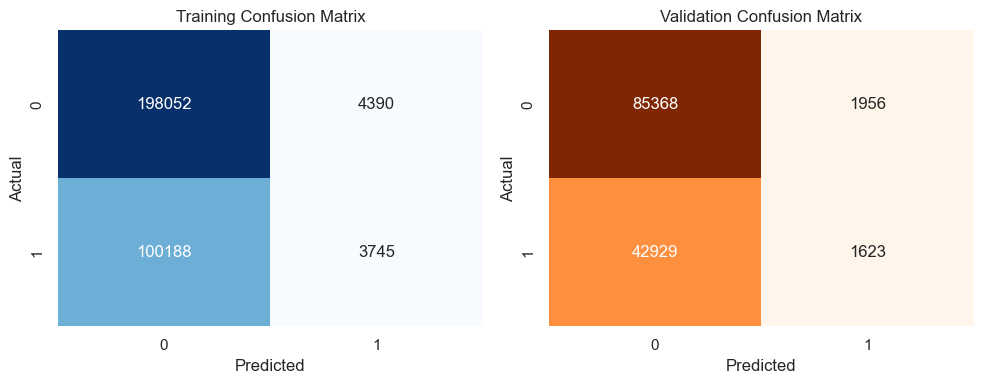

Time taken to run the cell: 39.03 seconds


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

# Record the start time
start_time = time.time()

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_final, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_final)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.2. Random Forest Trees</b> <a class="anchor" id="section_5_2"></a>


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       1.00      1.00      1.00    202442
4. TEMPORARY       1.00      1.00      1.00    103933

    accuracy                           1.00    306375
   macro avg       1.00      1.00      1.00    306375
weighted avg       1.00      1.00      1.00    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

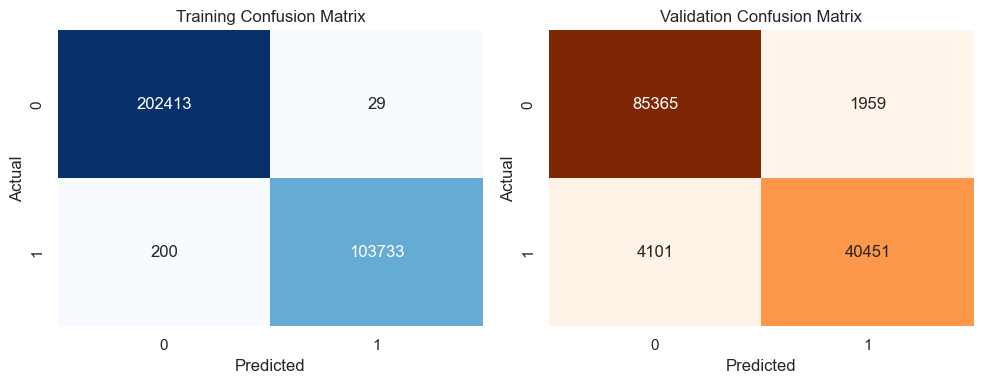

Time taken to run the cell: 140.98 seconds


In [243]:
# Record the start time
start_time = time.time()

#Initialize the model
rf_model = RandomForestClassifier(random_state=42)

#Fit the model to the train data
rf_model.fit(X_train_final, y_train_2_4)

#Predict the model for the train data
y_pred_rf_train = rf_model.predict(X_train_final)

#Predict the model for the validation data
y_pred_rf = rf_model.predict(X_val_final)

#Print the classification report
metrics(y_train_2_4, y_pred_rf_train, y_val_2_4, y_pred_rf)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.3. Decision Trees</b> <a class="anchor" id="section_5_3"></a>

Decision Trees are versatile models that can capture non-linear patterns by splitting data based on feature values.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       1.00      1.00      1.00    202442
4. TEMPORARY       1.00      1.00      1.00    103933

    accuracy                           1.00    306375
   macro avg       1.00      1.00      1.00    306375
weighted avg       1.00      1.00      1.00    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

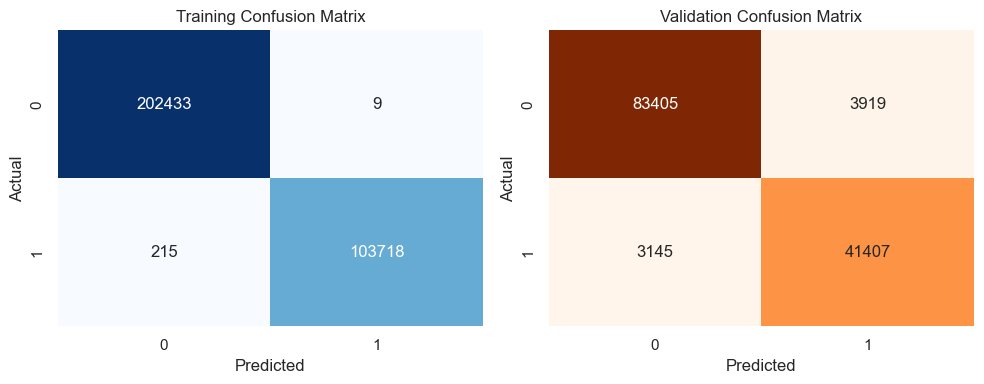

Time taken to run the cell: 31.81 seconds


In [244]:

from sklearn.tree import DecisionTreeClassifier
# Record the start time
start_time = time.time()

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the train data
dt_model.fit(X_train_final, y_train_2_4)

# Predict the model for the train data
y_pred_dt_train = dt_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_dt = dt_model.predict(X_val_final)

#Print the metric report
metrics(y_train_2_4, y_pred_dt_train, y_val_2_4, y_pred_dt)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


## 5.4. Gradient Boosting </b> <a class="anchor" id="section_5_4"></a>

Gradient Boosting models (e.g., XGBoost, LightGBM) are powerful ensemble methods that iteratively improve performance by minimizing errors. <br>

**XGBClassifier**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    202442
           1       0.98      0.94      0.96    103933

    accuracy                           0.97    306375
   macro avg       0.98      0.97      0.97    306375
weighted avg       0.97      0.97      0.97    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

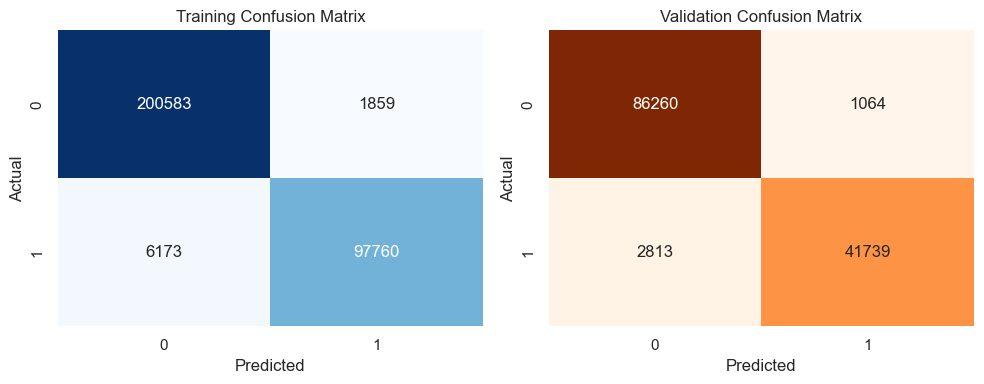

Time taken to run the cell: 3.39 seconds


In [245]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Record the start time
start_time = time.time()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_2_4_encoded = label_encoder.fit_transform(y_train_2_4)
y_val_2_4_encoded = label_encoder.transform(y_val_2_4)

# Initialize the model
gb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the train data
gb_model.fit(X_train_final, y_train_2_4_encoded)

# Predict the model for the train data
y_pred_gb_train = gb_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_gb = gb_model.predict(X_val_final)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_gb_train, y_val_2_4_encoded, y_pred_gb)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


**CatBoost (CatBoostClassifier)** <br>
CatBoost is a gradient boosting framework designed to natively support categorical features. It is efficient, easy to implement, and often performs well on tabular data.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    202442
           1       0.98      0.95      0.97    103933

    accuracy                           0.98    306375
   macro avg       0.98      0.97      0.97    306375
weighted avg       0.98      0.98      0.98    306375

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

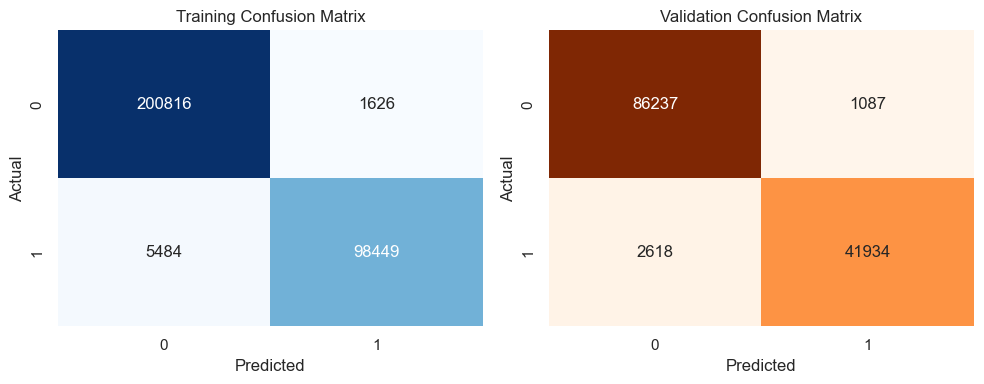

Time taken to run the cell: 39.59 seconds


In [246]:
from catboost import CatBoostClassifier
# Record the start time
start_time = time.time()

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs

# Fit the model to the training data
catboost_model.fit(X_train_final, y_train_2_4_encoded)

# Predict the model for the training data
y_pred_catboost_train = catboost_model.predict(X_train_final)

# Predict the model for the validation data
y_pred_catboost = catboost_model.predict(X_val_final)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_catboost_train, y_val_2_4_encoded, y_pred_catboost)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.5. Summary of Models </b> <a class="anchor" id="section_5_5"></a>


We focused on a select set of models for binary classification as the initial results provided promising performance metrics. Below is the performance table, including F1 scores for training and validation datasets, along with the time taken for each model to run.

| **Model**             | **F1 Score (Train)** | **F1 Score (Validation)** | **Time (seconds)** |
|------------------------|----------------------|----------------------------|---------------------|
| Logistic Regression    | 0.43                | 0.43                       | 35.77              |
| Random Forest          | 1.00                | 0.95                       | 144.97             |
| Decision Trees         | 1.00                | 0.94                       | 39.73              |
| XGBoost                | 0.97                | 0.97                       | 4.32               |
| CatBoost               | 0.97                | 0.97                       | 42.10              |

- **Logistic Regression**: Despite being simple and efficient, it showed lower F1 scores compared to other models.
- **Random Forest & Decision Trees**: Both achieved near-perfect training performance but showed slight overfitting on validation data.
- **XGBoost and CatBoost**: Achieved balanced F1 scores for both training and validation, with XGBoost being notably faster.

The ensemble methods, particularly XGBoost, exhibited strong performance with high F1 scores for both training and validation datasets, combined with efficient computation time. Due to its robustness and computational efficiency, we selected XGBoost as the primary model to apply to X_test_final.

For this evaluation, we will focus on the majority class (y_test == 1) while retaining the original output labels (using inverse label encoding). Additionally, we will count instances of NaN values for the minority classes (y_test == 2 and y_test == 4) to provide a comprehensive view of the test dataset distribution.

# 6. Loading the Results <a class="anchor" id="chapter6"></a>

In [247]:
# Filter the test data where y_test == 1
X_test_filtered = X_test_final.loc[y_test[y_test == 1].index]

# Remove non-numeric columns (like 'Final_Predictions') before prediction
X_test_filtered_numeric = X_test_filtered.select_dtypes(include=['int', 'float', 'bool', 'category'])

# Apply the model to predict on the filtered numeric test data
y_pred_test_filtered = gb_model.predict(X_test_filtered_numeric)

# Inverse transform the predictions to the original labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train_2_4)  # Use the encoder already fitted on training data
y_pred_test_original_filtered = label_encoder.inverse_transform(y_pred_test_filtered)

# Add the predictions back to the original test dataset
X_test_final.loc[y_test[y_test == 1].index, 'Pred_notebook_3'] = y_pred_test_original_filtered

# Count the occurrences of each class in the filtered test predictions
class_counts_filtered = pd.Series(y_pred_test_original_filtered).value_counts()

# Display results
print("Predicted Class Counts (Original Labels) for y_test == 1:")
print(class_counts_filtered)


Predicted Class Counts (Original Labels) for y_test == 1:
4. TEMPORARY    212961
2. NON-COMP         44
dtype: int64


In [253]:
# Ensure the index alignment before assigning
df_test['Pred_notebook_3'] = X_test_final.loc[df_test.index, 'Pred_notebook_3']

# Save the updated DataFrame to a file
df_test.to_csv('../Data_Temporary/df_test_pred_notebook3.csv', index=True)